La dilatacion se define como:
\begin{aligned}
    \delta(x,y) = \gamma*(x,y) + (\alpha,\beta)
\end{aligned}

In [81]:
colors = [ '#4cb963','#57c4e5', '#783f8e', '#ff5964','#BB9F06','#FFB8D1','#A26769','#084B83','#36151E','#D972FF','#DEFFFC','#89023E']

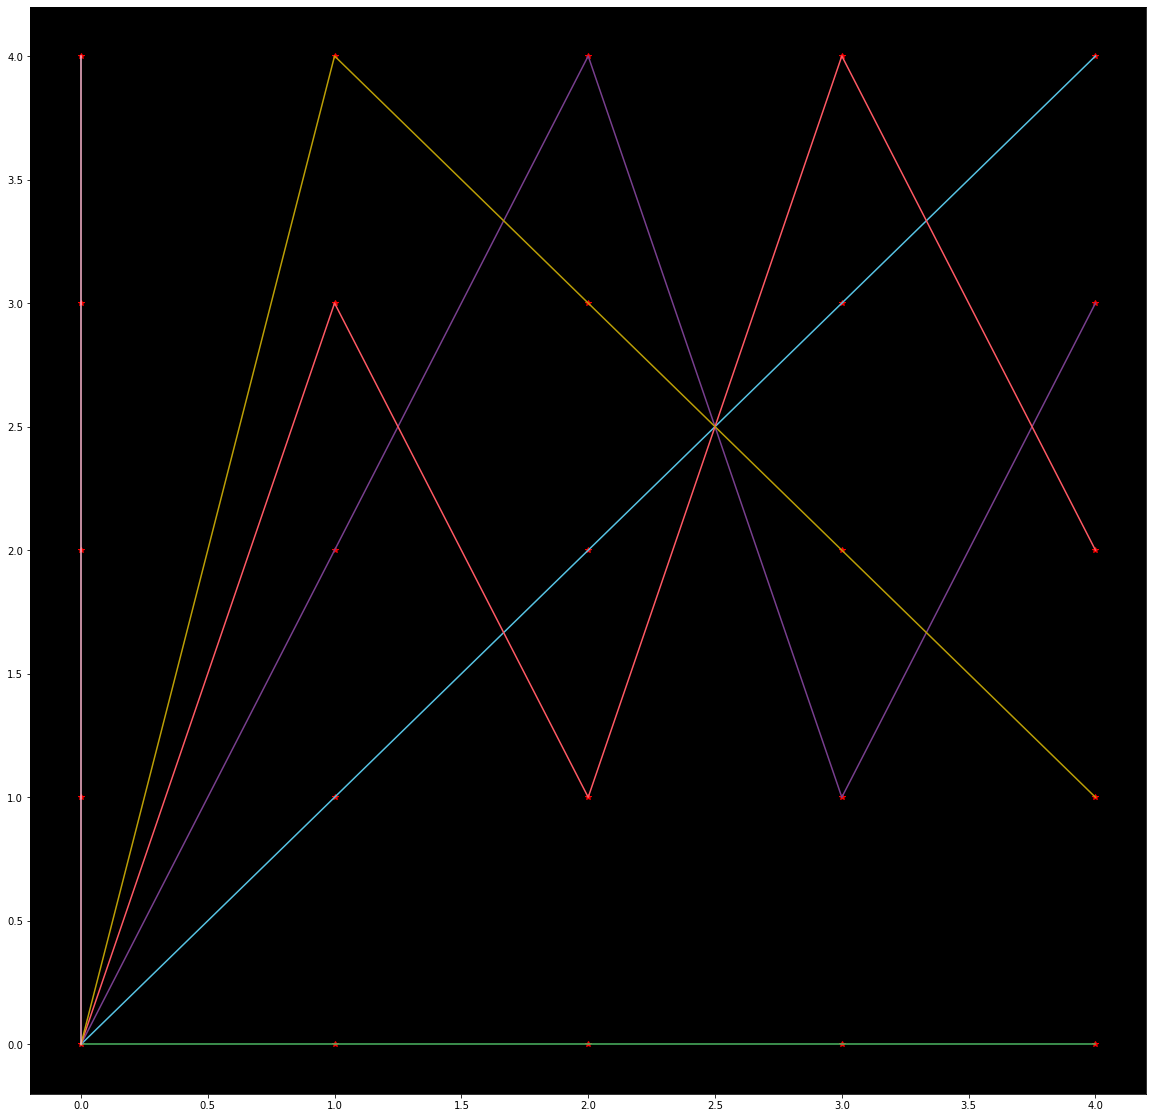

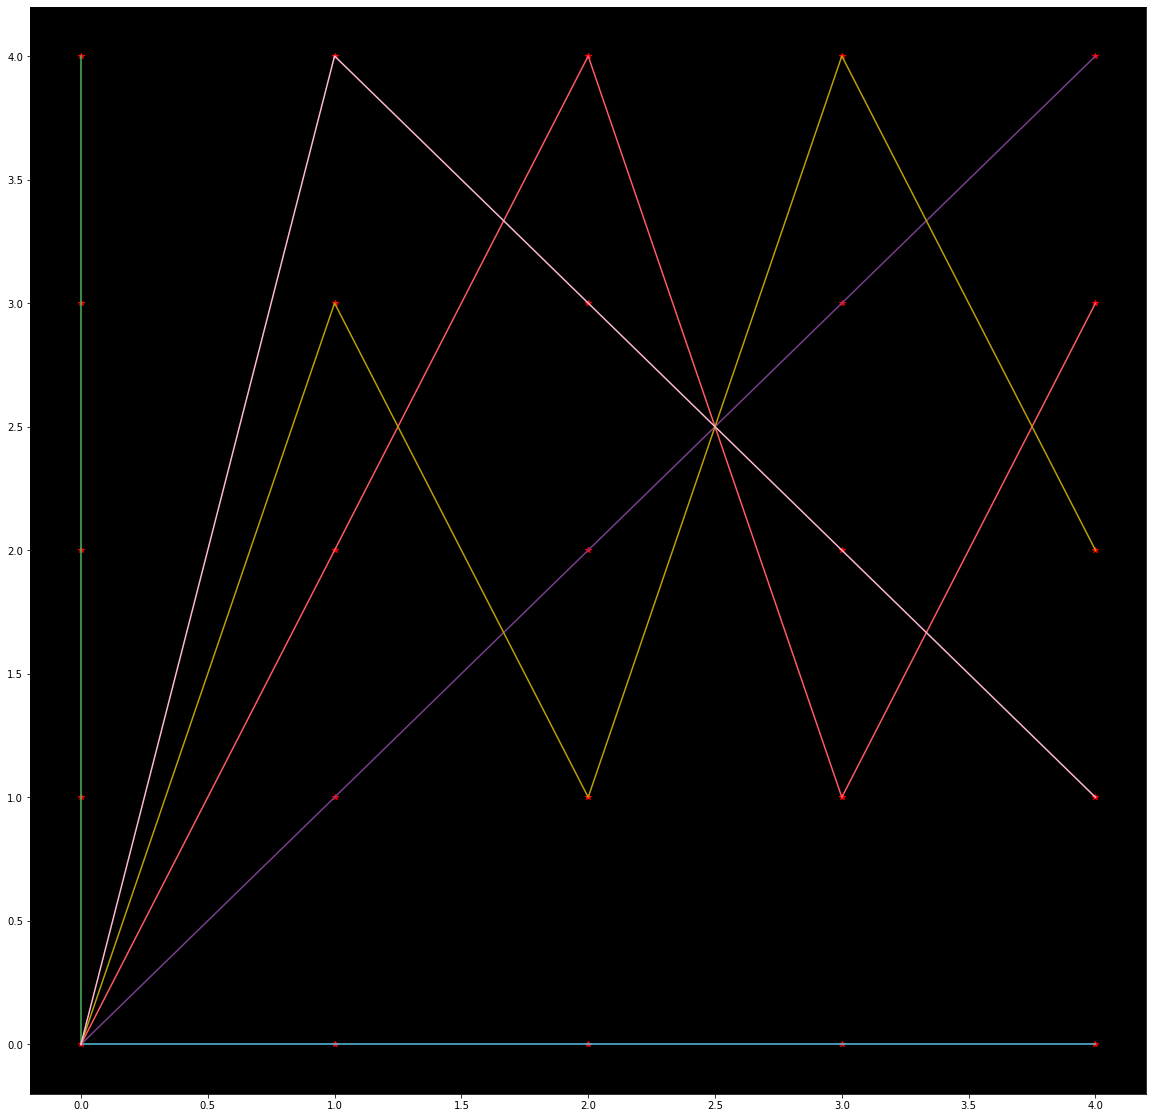

In [100]:
#P9

import numpy as np
from sage.combinat.cartesian_product import CartesianProduct_iters
import matplotlib.pyplot as plt

G = Zmod(5) #Zmod(n) genera en anillo modulo de los Z/nZ
G2 = CartesianProduct_iters(G.list(),G.list())#recibe dos lista y calcula el producto cartesiano Z3XZ3
aG = np.array(G.list()) #G.l]ist() me regresa una lista con los elementos del anillo.
                        #Luego la lista la convertimos a un numpy array
    
aG2 = np.array(G2.list())





mainLines =  generateOrderMainLines(np.reshape(aG2,[len(aG),len(aG),2]), aG,product_Zmod3) #Obtiene 1 linea de cada conjunto de lineas 
#mainLines2 = generateOrderMainLinesZn(aG,aG2)
lines =  []

plot_lines_set(mainLines, colors)
#plot_lines_set(mainLines2, colors)



#aLines = generateNewLines(mainLines)
#plot_plano(aLines)



In [98]:
def generateOrderMainLines(mK2,K, product): #Recibe como parametros dos numpy array uno es el grupo G y el otro es GXG
    mainLines = []
    for point in mK2[1,:]:        
        #print(np.repeat([point],len(K), axis=0))
        mainLines.append(product(np.repeat([point],len(K), axis=0), np.transpose(np.array([K,K]))))
    
    mainLines.append(product(np.repeat([mK2[0,:][1]],len(K), axis=0), np.transpose(np.array([K,K]))))

    return np.array(mainLines)


In [91]:
def product_Zmod3(a,b):
    ab = a*b
        
    return ab

    

In [85]:
def generateNewLines(mainLines):
    for l in range(len(mainLines)): #calcula las demas lineas a partir de la dilatacion
        line = []
        for i in aG:
            if mainLines[l][1][0] == 0: 
                #print(dilatation(mainLines[l],i,0,1),"\n")
                line.append(merge_sort(dilatation(mainLines[l],i,0,1)))
            elif mainLines[l][1][1] == 0:
                #print(dilatation(mainLines[l],0,i,1),"\n")
                line.append(merge_sort(dilatation(mainLines[l],0,i,1)))
            else:
                #print(dilatation(mainLines[l],i,0,1),"\n")
                line.append(merge_sort(dilatation(mainLines[l],i,0,1)))
        aline = np.array(line)
        lines.append(aline)

    aLines = np.array(lines)
    return aLines
    
def dilatation(l,a,b,y): #define una dilatacion como se especifica arriba
    return y*l+ np.array([a,b])


def merge_sort(array):
    # If the input array contains fewer than two elements,
    # then return it as the result of the function
    if len(array) < 2:
        return array
    

    midpoint = len(array) // 2

    # Sort the array by recursively splitting the input
    # into two equal halves, sorting each half and merging them
    # together into the final result
    return merge(
        left=merge_sort(array[:midpoint]),
        right=merge_sort(array[midpoint:]))


def merge(left, right):
    # If the first array is empty, then nothing needs
    # to be merged, and you can return the second array as the result
    #print('l',left,'r', right)
    if len(left) == 0:
        return right

    # If the second array is empty, then nothing needs
    # to be merged, and you can return the first array as the result
    if len(right) == 0:
        return left

    result = []
    index_left = index_right = 0

    # Now go through both arrays until all the elements
    # make it into the resultant array
    while len(result) < len(left) + len(right):
        # The elements need to be sorted to add them to the
        # resultant array, so you need to decide whether to get
        # the next element from the first or the second array
        if left[index_left][0] <= right[index_right][0]:
            result.append(left[index_left])
            index_left += 1
        else:
            result.append(right[index_right])
            index_right += 1

        # If you reach the end of either array, then you can
        # add the remaining elements from the other array to
        # the result and break the loop
        if index_right == len(right):
            #print(result,left,right)
            for i in left[index_left:]:
                result.append(i)
            break

        if index_left == len(left):
            #print(result,left,right)
            for i in right[index_right:]:
                result.append(i)
            break
            
    #print(result)

    return result

In [74]:
def generateMainLinesZn(g, gCuadrado): #Recibe como parametros dos numpy array uno es el grupo G y el otro es GXG
    lines = list()
    line = list()
    tgCuadrado = tuple(map(tuple, gCuadrado))#convierte GXG de un numpy array a una tupla de tuplas 
    dgCuadrado = dict(zip(tgCuadrado, tgCuadrado)) #Convierte la tuplas a un diccionario con clave-valor (x,y):(x,y) elemnto de GXG
    value00 = tgCuadrado[0] #punto raiz (0,0)
    dgCuadrado.pop(value00)
    value00 = np.array(value00)
    for i in range(len(g)+1):
        line.append(value00) #para cada vuleta asociada cada linea principal el punto raiz (0,0)
        tValue = list(dgCuadrado.values())[0] #obtiene las una lista aprtir  de las tuplas y obtiene el primer valor de la lista 
        value = np.array(tValue) #la tupla especifica la convierte a numpy array para poder realizar operaciones 
        
        for j in range(1,len(g)):
            tNewValue = tuple(tValue)
            newValue = np.array(value)
            line.append(newValue)
            dgCuadrado.pop(tNewValue)
            #gCuadrado = np.delete(gCuadrado,np.where(gCuadrado ==newValue)[0][0], axis=0)
            value += value
            tValue = tuple(value.tolist())
    
        lines.append(np.array(line))
        #gCuadrado = np.delete(gCuadrado,np.where(gCuadrado == value*value)[0][0], axis=0)
        line.clear()

        
        
    return np.array(lines)



            
    

In [76]:
def generateOrderMainLinesZn(g, gCuadrado): #Recibe como parametros dos numpy array uno es el grupo G y el otro es GXG
    lines = list()
    line = list()
    tgCuadrado = tuple(map(tuple, gCuadrado))#convierte GXG de un numpy array a una tupla de tuplas 
    dgCuadrado = dict(zip(tgCuadrado, tgCuadrado)) #Convierte la tuplas a un diccionario con clave-valor (x,y):(x,y) elemnto de GXG
    value00 = tgCuadrado[0] #punto raiz (0,0)
    dgCuadrado.pop(value00)
    value00 = np.array(value00)
    for i in range(len(g)+1):
        line.append(value00) #para cada vuleta asociada cada linea principal el punto raiz (0,0)
        tValue = list(dgCuadrado.values())[0] #obtiene las una lista aprtir  de las tuplas y obtiene el primer valor de la lista 
        value = np.array(tValue) #la tupla especifica la convierte a numpy array para poder realizar operaciones 
        
        for j in range(1,len(g)):
            tNewValue = tuple(tValue)
            newValue = np.array(value)
            line = orderLine(line, newValue)
            dgCuadrado.pop(tNewValue)
            #gCuadrado = np.delete(gCuadrado,np.where(gCuadrado ==newValue)[0][0], axis=0)
            value += line[1]
            tValue = tuple(value.tolist())
    
        lines.append(np.array(line))
        #gCuadrado = np.delete(gCuadrado,np.where(gCuadrado == value*value)[0][0], axis=0)
        line.clear()

        
        
    return np.array(lines)



def orderLine(line, newValue):
    if len(line):
        if line[len(line)-1][0]>newValue[0]:
            print('1',line)
            oldValue =  np.array(line[len(line)-1])
            line[len(line)-1] = newValue
            print('2',line)
            line.append(oldValue)
            print('3',line)

        else:
            line.append(newValue)
    
      
    
    return line
    

In [79]:

            
def plot_plano(alines):
    npoints = alines.shape[1]
    xpoint = np.matrix(np.arange(npoints))
    for j in range(len(alines)):
        fig, ax = plt.subplots(figsize=(20,20))
        ax.set_facecolor("black")

        for i in range(npoints):
            ax.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')
    
        for line in alines[j]:
            ax.plot(line[:,0],line[:,1], color = colors[j])
            
        fig.savefig(f'linasDireccion{j}.png')
        fig.savefig(f'linasDireccion{j}.svg')
    
    fig2, ax2 = plt.subplots(figsize=(20,20))
    ax2.set_facecolor("black")

    for i in range(len(alines)):
        for line in alines[i]:
            ax2.plot(line[:,0],line[:,1], color = colors[i])
    fig2.savefig(f'tpdoElPlano.png')
    fig2.savefig(f'tpdoElPlano.svg')


    


In [78]:
def plot_lines_set(lines, colors):
    npoints = lines.shape[1]
    xpoint = np.matrix(np.arange(npoints))
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_facecolor("black")
    for i in range(npoints):
        ax.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')
                        
    for i in range(len(lines)):
        ax.plot(lines[i][:,0],lines[i][:,1], color = colors[i])
    
    fig.savefig(f'linasPrincipalesCadaDireccion{npoints}.png')
    fig.savefig(f'linasPrincipalesCadaDireccion{npoints}.svg')

    

In [40]:
#P25

#Lo mismo que hay para P9 
import numpy as np
from sage.combinat.cartesian_product import CartesianProduct_iters


G = Zmod(5)
G2 = CartesianProduct_iters(G.list(),G.list())
aG = np.array(G.list())
aG2 = np.array(G2.list())


lines = generateMainLinesZn(aG,aG2)

print(lines)

def dilatation(l,a,b,y):
    return y*l+ np.array([a,b])

for l in range(len(lines)):
    for i in aG:
        for j in aG:
            print(dilatation(lines[l],i,j,1),"\n")



generateMainLines(aG,aG2)

NameError: name 'generateMainLinesZn' is not defined

In [5]:
K = KleinFourGroup() #Obtiene el grupo de Klein de orden 4
Z3 = Zmod(3)

In [61]:
import numpy as np
from sage.combinat.cartesian_product import CartesianProduct_iters

K2 = CartesianProduct_iters(K.list(),K.list())#recibe dos lista y calcula el producto cartesiano Z3XZ3

aK = np.array(K.list())


#print(K.cayley_table())



aK = np.array(K.list()) #G.l]ist() me regresa una lista con los elementos del anillo.
                        #Luego la lista la convertimos a un numpy array
    
aK2 = np.array(K2.list())

mK2 = np.reshape(aK2, [4,4,2])
#print(mK2)


generateOrderMainLinesRaros(mK2, aK,product_F4)



[[() ()]
 [() (3,4)]
 [() (1,2)]
 [() (1,2)(3,4)]]
[[() ()]
 [(3,4) (3,4)]
 [(1,2) (1,2)]
 [(1,2)(3,4) (1,2)(3,4)]]
[[() ()]
 [(1,2) (3,4)]
 [(1,2)(3,4) (1,2)]
 [(3,4) (1,2)(3,4)]]
[[() ()]
 [(1,2)(3,4) (3,4)]
 [(3,4) (1,2)]
 [(1,2) (1,2)(3,4)]]


In [6]:


def product_F4(a,b):
    #print(a,b)

    #print(vf4_to_Zmod3(a))
    #print(vf4_to_Zmod3(b))
    
    z3_a = vf4_to_Zmod3(a)
    z3_b = vf4_to_Zmod3(b)
   # print(z3_a[1], z3_b[1])
    
    
   
    z3_aPlusb = z3_a+z3_b
        
    print(vZmod3_to_F4(z3_aPlusb))

    
def f4_to_Zmod3(a):
    if a==K.list()[0]:
        return -4
    if  a==K.list()[1]:
        return 0
    if  a==K.list()[2]:
        return 1
    if  a==K.list()[3]:
        return 2
    
    raise NotImplementedError
    
def zmod3_to_F4(a):
    if a<0:
        return K.list()[0]
    if a%3== G.list()[0]:
        return K.list()[1]
    if a%3== G.list()[1]:
        return K.list()[2]
    if a%3==G.list()[2]:
        return K.list()[3]
    
    
    
vf4_to_Zmod3 = np.vectorize(f4_to_Zmod3)
vZmod3_to_F4 = np.vectorize(zmod3_to_F4)

K2 = CartesianProduct_iters(K.list(),K.list())#recibe dos lista y calcula el producto cartesiano Z3XZ3

aK2 = np.array(K2.list())


product_F4(aK2[10],aK[3])

NameError: name 'aK' is not defined

In [34]:


print(Z3.list()[0]+Z3.list()[1])

1


In [38]:
x = np.array([[1,2]])

np.repeat(x, 3, axis=0)

array([[1, 2],
       [1, 2],
       [1, 2]])